# Milestones 2 - Phase 1
- Milestones   ini   dibuat   guna   mengevaluasi pembelajaran pada Hacktiv8 Data Science Full Time Program khususnya pada Phase 1


# Introduction
- Nama : Harun Hawari Ash Shiddiq
- Dataset :
    - https://www.kaggle.com/blastchar/telco-customer-churn (dataset used)
    - https://www.kaggle.com/imakash3011/customer-personality-analysis 
    - https://www.kaggle.com/arjunbhasin2013/ccdata 
    - https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python
- Objective : Clustering Customer Churn

# Import Libarary

In [1]:
# Packages for cleaning and processing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

# Packages for feature engineering and preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.model_selection import train_test_split


# Packages for machine learning and modelling
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans

# Packagers for evaluation

import warnings
warnings.filterwarnings('ignore')

# Data Loading

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
pd.set_option('display.max.columns', None)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


**Columns Information**
- SeniorCitizen : Whether the customer is a senior citizen or not (1, 0)
- Partner : Whether the customer has a partner or not (Yes, No)
- Dependents : Whether the customer has dependents or not (Yes, No)
- tenure : Number of months the customer has stayed with the company
- PhoneService : Whether the customer has a phone service or not (Yes, No)
- MultipleLines : Whether the customer has multiple lines or not (Yes, No, No phone service)
- InternetService : Customer’s internet service provider (DSL, Fiber optic, No)
- OnlineSecurity : Whether the customer has online security or not (Yes, No, No internet service)
- OnlineBackup : Whether the customer has online backup or not (Yes, No, No internet service)
- DeviceProtection : Whether the customer has device protection or not (Yes, No, No internet service)
- TechSupport : Whether the customer has tech support or not (Yes, No, No internet service)
- StreamingTV : Whether the customer has streaming TV or not (Yes, No, No internet service)
- StreamingMovies : Whether the customer has streaming movies or not (Yes, No, No internet service)
- Contract : The contract term of the customer (Month-to-month, One year, Two year)
- PaperlessBilling : Whether the customer has paperless billing or not (Yes, No)
- PaymentMethod : The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- MonthlyCharges : The amount charged to the customer monthly
- TotalCharges : The total amount charged to the customer
- Churn : Whether the customer churned or not (Yes or No)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**Diketahui feature TotalCharges masih berupa object sedangkan valuenya numerik**

In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# Data Cleaning

**Mengubah tipe data yang sesuai pada feature, namun sebelum dilakukan perlu dilakukan handling missing value**

In [5]:
df['TotalCharges'].iloc[488]

' '

In [6]:
df['TotalCharges'].iloc[753]

' '

**Diketahui terdapat missing value pada feature TotalCharges yaitu ' '**

In [7]:
df['TotalCharges'] = df['TotalCharges'].drop(488, axis=0)
df['TotalCharges'] = df['TotalCharges'].drop(753, axis=0)

**Drop setiap value yang ada ' '**

In [8]:
df = df.drop(df.index[df['TotalCharges']== ' '])

In [9]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        2
Churn               0
dtype: int64

In [10]:
df.dropna(inplace=True)

In [11]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**Kemudian barulah ubah tipe data sesuai featurenya**

In [12]:
# pd.to_numeric(df['TotalCharges'], downcast='float')
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [13]:
missing = pd.DataFrame(df.isnull().sum(), columns=['No. Missing Value'])
missing['% Missing Value'] = (missing['No. Missing Value']/len(df)).round(3)*100
missing

,No. Missing Value,% Missing Value
customerID,0,0.0
gender,0,0.0
SeniorCitizen,0,0.0
Partner,0,0.0
Dependents,0,0.0
tenure,0,0.0
PhoneService,0,0.0
MultipleLines,0,0.0
InternetService,0,0.0
OnlineSecurity,0,0.0


**Tidak ada missing value dan dilihat dari describe tidak ada data anomaly kemudian dicek apakah ada data duplikat atau tidak**

In [14]:
print('Is there any duplication of data : {}'.format(df.duplicated().any()))
print('Amount of data duplication : {}'.format(df.duplicated().sum()))

Is there any duplication of data : False
Amount of data duplication : 0


In [15]:
df[df.duplicated()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [16]:
df.drop_duplicates(inplace=True)
print('Is there any duplication of data : {}'.format(df.duplicated().any()))
print('Amount of data duplication : {}'.format(df.duplicated().sum()))

Is there any duplication of data : False
Amount of data duplication : 0


**Tidak ada data duplikat**

# Data Exploration

In [17]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Disini saya ingin melihat korelasi setiap feature namun sebelumnya saya akan melakukan label encoding pada feature kategori**

**Memisahkan kolom numerik dan ketegori**

In [18]:
df_num = df.select_dtypes('number')
df_cat = df.select_dtypes('object')
col_num = df_num.columns.tolist()
col_cat = df_cat.columns.tolist()
print('numerical colomns : {}'.format(col_num))
print('========')
print('categorical colomns : {}'.format(col_cat))

numerical colomns : ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
categorical colomns : ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [19]:
encoder = LabelEncoder()
df_cat['gender'] = encoder.fit_transform(df_cat['gender'])
df_cat['Partner'] = encoder.fit_transform(df_cat['Partner'])
df_cat['Dependents'] = encoder.fit_transform(df_cat['Dependents'])
df_cat['PhoneService'] = encoder.fit_transform(df_cat['PhoneService'])
df_cat['MultipleLines'] = encoder.fit_transform(df_cat['MultipleLines'])
df_cat['InternetService'] = encoder.fit_transform(df_cat['InternetService'])
df_cat['OnlineSecurity'] = encoder.fit_transform(df_cat['OnlineSecurity'])
df_cat['OnlineBackup'] = encoder.fit_transform(df_cat['OnlineBackup'])
df_cat['DeviceProtection'] = encoder.fit_transform(df_cat['DeviceProtection'])
df_cat['TechSupport'] = encoder.fit_transform(df_cat['TechSupport'])
df_cat['StreamingTV'] = encoder.fit_transform(df_cat['StreamingTV'])
df_cat['StreamingMovies'] = encoder.fit_transform(df_cat['StreamingMovies'])
df_cat['Contract'] = encoder.fit_transform(df_cat['Contract'])
df_cat['StreamingMovies'] = encoder.fit_transform(df_cat['StreamingMovies'])
df_cat['PaperlessBilling'] = encoder.fit_transform(df_cat['PaperlessBilling'])
df_cat['PaymentMethod'] = encoder.fit_transform(df_cat['PaymentMethod'])
df_cat['Churn'] = encoder.fit_transform(df_cat['Churn'])

In [20]:
df_corr = pd.merge(df_cat, df_num, left_index=True, right_index=True) 

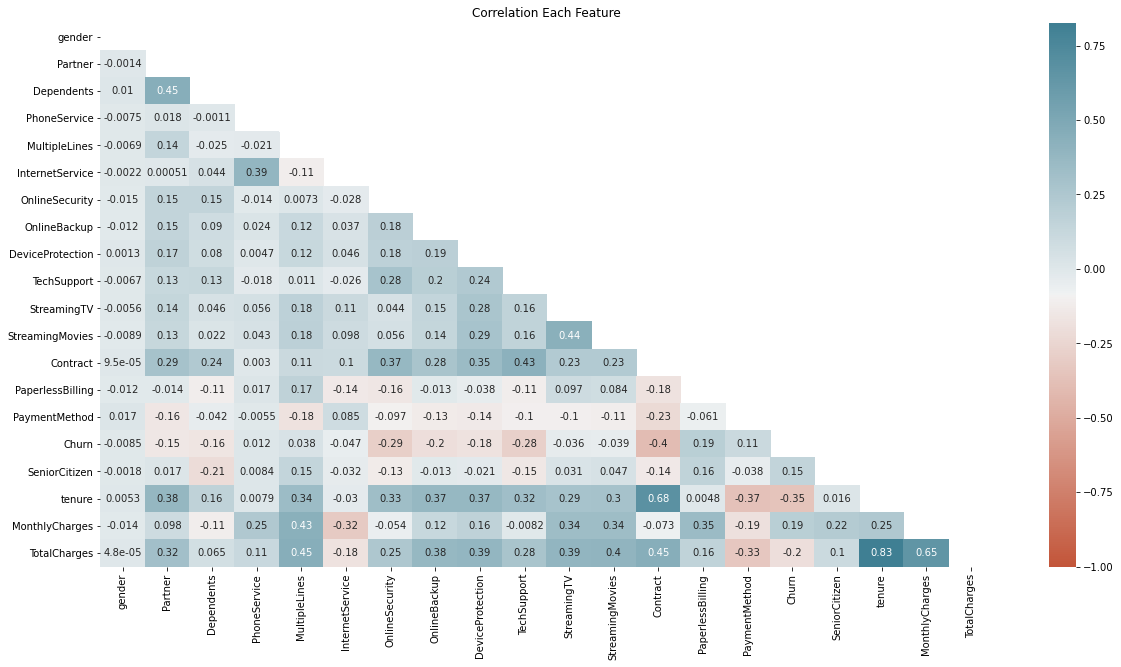

In [21]:
corr_matrix = np.triu(df_corr.corr())
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(df_corr.corr(), cmap=sns.diverging_palette(20, 220, as_cmap=True), mask=corr_matrix, vmin=-1, annot=True)
plt.title('Correlation Each Feature');

Skewness Value SeniorCitizen: 1.8311025436022044


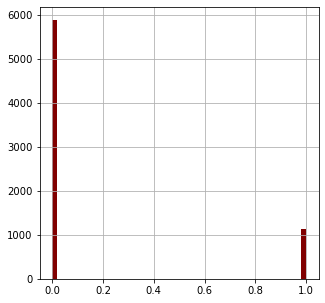

Skewness Value tenure: 0.23773083190513133


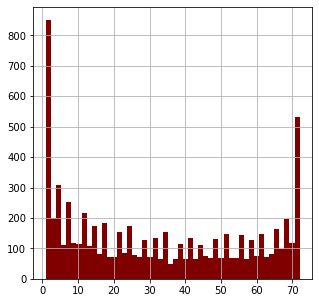

Skewness Value MonthlyCharges: -0.22210292770166232


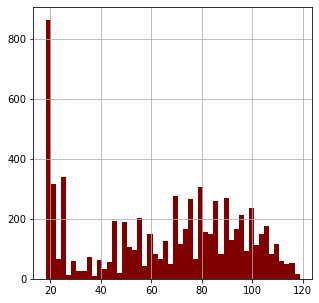

Skewness Value TotalCharges: 0.9616424997242504


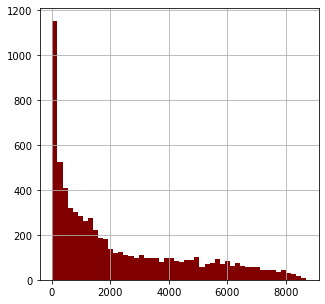

In [22]:
col = df_num.columns.to_list()

for i in col:
    df[i].hist(bins=50, figsize=(5,5), color='maroon')
    print('Skewness Value {}:'.format(i), df[i].skew())
    plt.show()

# Data Preprocessing

**Feature engineering menggunakan nilai vif, mecari nilai multicolinear rendah yaitu <5**

In [27]:
x1 = df_corr.select_dtypes(include=np.number)
vif_df = pd.DataFrame()
vif_df["Feature"] = x1.columns
vif_df["VIF"] = [vif(x1.values, i) for i in range(len(x1.columns))]
vif_df

,Feature,VIF
0,gender,1.954856
1,Partner,2.819317
2,Dependents,1.957986
3,PhoneService,15.198554
4,MultipleLines,2.761146
5,InternetService,4.379748
6,OnlineSecurity,2.257841
7,OnlineBackup,2.459222
8,DeviceProtection,2.631343
9,TechSupport,2.392227


In [28]:
x2 = df_corr.drop(['MonthlyCharges', 'tenure', 'PhoneService', 'TotalCharges'], axis=1)

x = x2.select_dtypes(include=np.number)
vif_df = pd.DataFrame()
vif_df["Feature"] = x.columns
vif_df["VIF"] = [vif(x.values, i) for i in range(len(x.columns))]
vif_df

,Feature,VIF
0,gender,1.871841
1,Partner,2.663097
2,Dependents,1.933855
3,MultipleLines,2.203380
4,InternetService,2.341500
5,OnlineSecurity,2.166609
6,OnlineBackup,2.281708
7,DeviceProtection,2.538243
8,TechSupport,2.355757
9,StreamingTV,2.963838


**Berdasarkan value vif maka feature yang tidak digunakan adalah MonthlyCharges, tenure, PhoneService, TotalCharges. Feature customerID juga di drop karena unique id tidak berpengaruh terhadap clustering** 

In [29]:
data = df.copy()
delete = ['MonthlyCharges', 'tenure', 'PhoneService', 'TotalCharges', 'customerID']
data.drop(delete, inplace=True, axis=1)

# Modelling

In [30]:
categorical = list(data.select_dtypes('object').columns)
print(f"Categorical columns are: {categorical}")

# Define numerical columns
numerical = list(data.select_dtypes('number').columns)
print(f"Numerical columns are: {numerical}")

Categorical columns are: ['gender', 'Partner', 'Dependents', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
Numerical columns are: ['SeniorCitizen']


In [31]:
num_pipeline = Pipeline([
    ('scaler', MinMaxScaler())                         
])

cat_pipeline = Pipeline([
    ('encoder', OneHotEncoder())
])

full_pipeline = ColumnTransformer([
        ('numerical', num_pipeline, numerical),
        ('categorical', cat_pipeline, categorical)], remainder = 'passthrough')

In [39]:
data = full_pipeline.fit_transform(data)

In [40]:
data

array([[0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 1., 1., 0.],
       [0., 0., 1., ..., 1., 0., 1.],
       ...,
       [0., 1., 0., ..., 0., 1., 0.],
       [1., 0., 1., ..., 1., 0., 1.],
       [0., 0., 1., ..., 0., 1., 0.]])

**Disini saya akan mencari jumlah k yang akan digunakan dalam modelling k-mean dengan menggunaan elbow method**

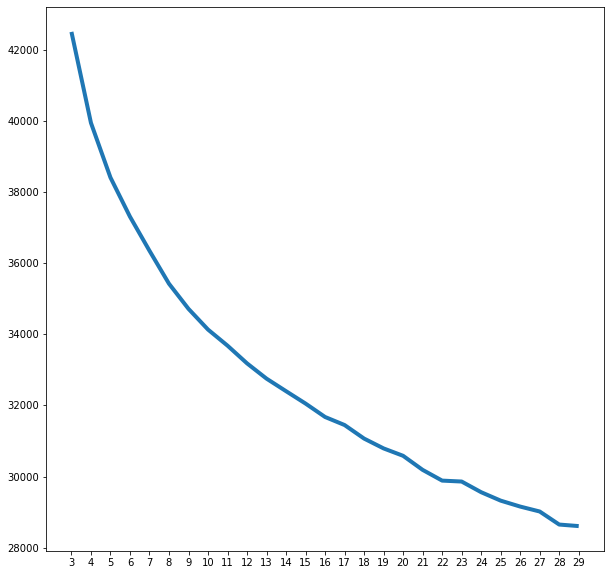

In [41]:
cost = []
ks = []
f,ax = plt.subplots(figsize=(10,10))
for i in range(3,30):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    cost.append(kmeans.inertia_)
    ks.append(i)
plt.style.use('fivethirtyeight')
sns.lineplot(x=np.array(ks), y=np.array(cost))
plt.xticks(ks)
plt.show()

**Dari visualisasi sulit dilihat dimana grafik menunjukkan patahan/elbow, namun menurut saya patahan pertama terlihat saat k=8**

In [42]:
kmeans = KMeans(n_clusters=8)
kmeans.fit(data)
out = kmeans.predict(data)

In [47]:
out

array([4, 2, 4, ..., 0, 3, 5])